# This notebook calculates North America APW based on .rot files from global plate reconstructions

In [41]:
import pmagpy.ipmag as ipmag
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pole_rotation import*
import pygplates
import cartopy.crs as ccrs
import cartopy
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [9]:
fixed_plate = 1 # fix spin axis
NAM = 101 # plate number for North America

resolution = 200 # resolution of the APW to calculate
max_age = 60 # max age in Ma, min age is 0 Ma

## import the result of running mean of recomputed study level paleomagnetic poles

In [7]:
RM_APWP_rec_POLES = pd.read_csv('../data/RM_APWP_rec_POLES.csv')
RM_APWP_rec_POLES

,age,N,n_studies,k,A95,csd,plon,plat,geom,kappa_norm,N_norm
0,0.0,15.0,15.0,156.445419,3.066621,6.475952,295.238097,-87.078353,POLYGON ((-64.76190318007292 -84.0267771274608...,0.167293,0.833333
1,3.0,15.0,15.0,156.445419,3.066621,6.475952,295.238097,-87.078353,POLYGON ((-64.76190318007292 -84.0267771274608...,0.167293,0.833333
2,6.0,15.0,15.0,156.445419,3.066621,6.475952,295.238097,-87.078353,POLYGON ((-64.76190318007292 -84.0267771274608...,0.167293,0.833333
3,9.0,16.0,16.0,162.724036,2.900340,6.349787,299.799316,-86.944434,POLYGON ((-60.20068443507421 -84.0583190163856...,0.174007,0.888889
4,12.0,18.0,18.0,160.764047,2.734593,6.388377,310.549641,-86.580159,POLYGON ((-49.45035864633746 -83.8589570107034...,0.171911,1.000000
5,15.0,10.0,10.0,199.151883,3.431521,5.739748,323.907997,-86.104514,POLYGON ((-36.09200334124313 -82.6897042881403...,0.212961,0.555556
6,18.0,9.0,9.0,314.236975,2.908877,4.569371,342.307196,-84.383807,POLYGON ((-17.6928044967147 -81.48893418848684...,0.336025,0.500000
7,21.0,7.0,7.0,935.158537,1.975052,2.648759,341.241992,-81.863357,POLYGON ((-18.75800828690251 -79.8976171374349...,1.000000,0.388889
8,24.0,5.0,5.0,901.354150,2.550063,2.697971,342.634924,-81.817309,POLYGON ((-17.36507572039818 -79.2792216122420...,0.963852,0.277778
9,27.0,6.0,6.0,587.913266,2.765648,3.340630,336.878569,-82.328426,POLYGON ((-23.12143084436519 -79.5758274002022...,0.628678,0.333333


## Get APW from Muller et al., 2016

- Müller, R. D., Seton, M., Zahirovic, S., Williams, S. E., Matthews, K. J., Wright, N. M., ... & Cannon, J. (2016). Ocean basin evolution and global-scale plate reorganization events since Pangea breakup. Annual Review of Earth and Planetary Sciences, 44, 107-138. DOI:10.1146/annurev-earth-060115-012211


(-58.09626049814988, -43.552580884779644, -13.799284647523002)


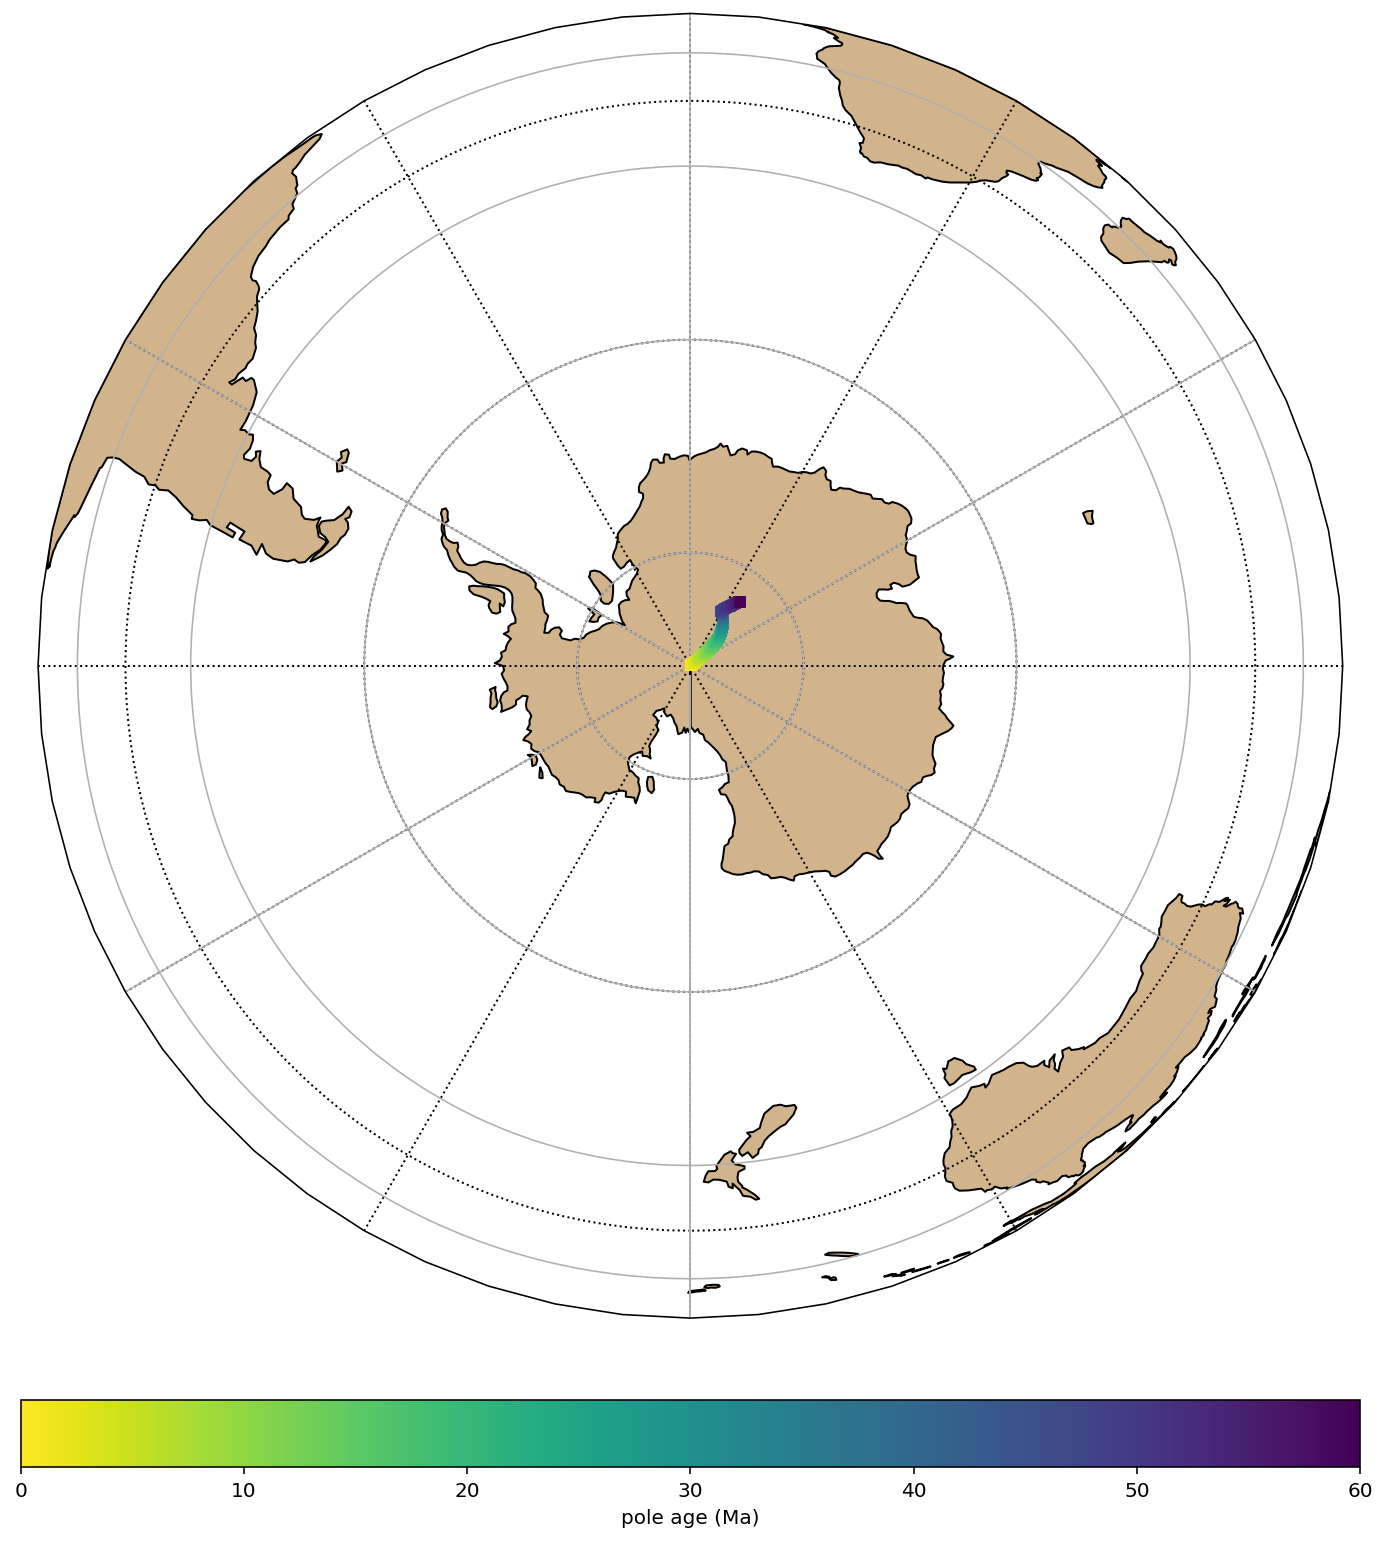

In [3]:
Muller2016_rotation_file = '../data/Muller2016a_Global_EarthByte_230-0Ma_GK07_AREPS.rot'
Muller2016_rotation_model = pygplates.RotationModel(Muller2016_rotation_file)

times = np.linspace( 0., max_age, resolution)
lats = np.empty_like(times)
lons = np.empty_like(times)
pole = PlateCentroid( 0., -90. )
angles = np.empty_like(times)

Euler_lats = np.empty_like(times)
Euler_lons = np.empty_like(times)

for i,t in enumerate(times):
    start_time = 0. if t==0. else times[i-1]
    rotation = Muller2016_rotation_model.get_rotation( t, NAM, start_time, fixed_plate)
    lat, lon, angle = rotation.get_lat_lon_euler_pole_and_angle_degrees()
    Euler_lats[i] = lat
    Euler_lons[i] = lon
    euler_pole = EulerPole( lon, lat, 1.) # Don't care about the rate here
    pole.rotate( euler_pole, -angle)
    angles[i] = angle*resolution/max_age
    lats[i] = pole.latitude
    lons[i] = pole.longitude

average_rotation = Muller2016_rotation_model.get_rotation(times[-1], NAM, 0.0, fixed_plate)
print(average_rotation.get_lat_lon_euler_pole_and_angle_degrees())

ax = ipmag.make_orthographic_map(0, -90, figsize=(15,15))

ipmag.plot_poles_colorbar(ax,lons,
                          lats,
                          np.zeros(len(lats)),
                          times,
                          0,max_age,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

ax.set_global()
ax.gridlines()
lon_shift=0.
plt.show()

np.savetxt('code_output/NAM_0_60_muller_2016.txt', np.array([times, lons, lats,angles, Euler_lons, Euler_lats]).T )

## Get APW from Torsvik and Cocks 2017

(-27.95597015208589, -78.15137649104618, -18.537191039711207)


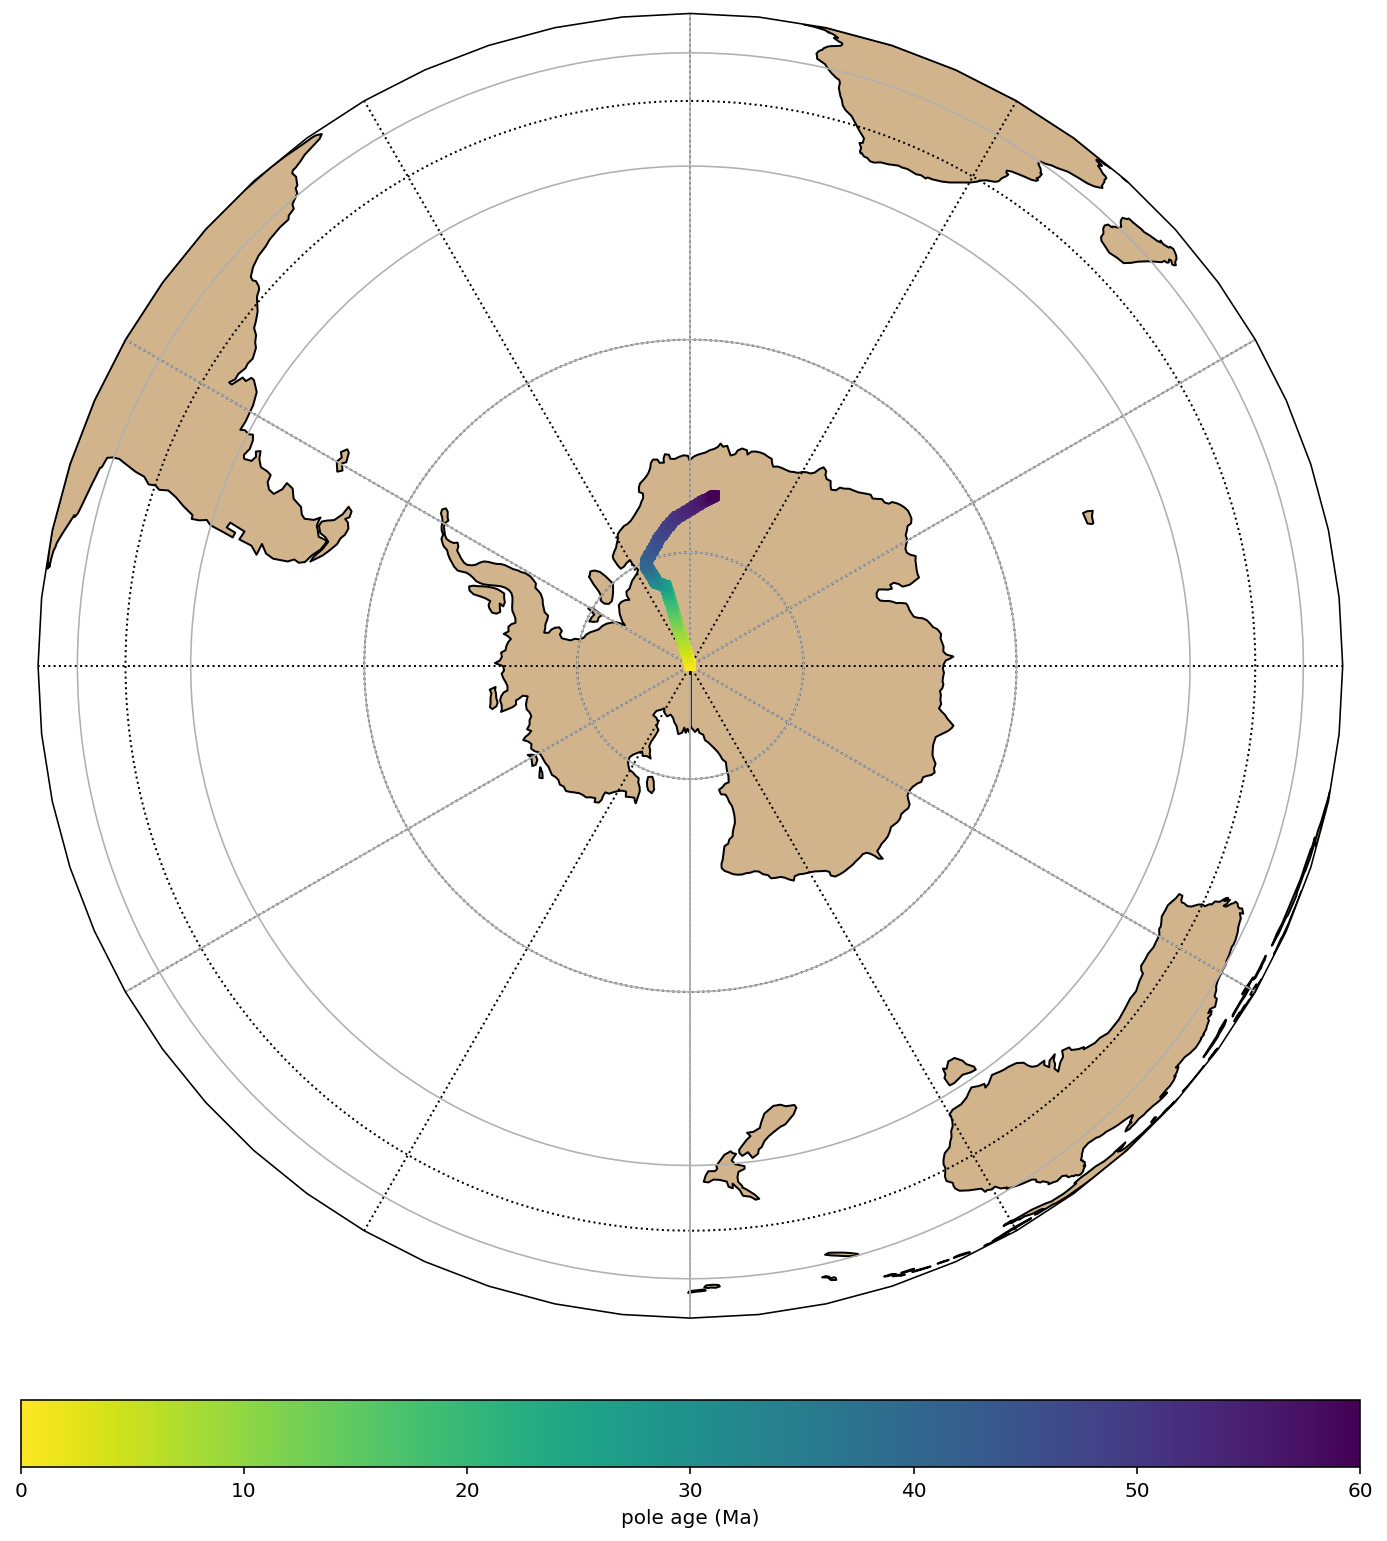

In [4]:
Torsvik2017_rotation_file = '../data/Torsvik_Cocks_HybridRotationFile.rot'
Torsvik2017_rotation_model = pygplates.RotationModel(Torsvik2017_rotation_file)

times = np.linspace( 0., max_age, resolution)
lats = np.empty_like(times)
lons = np.empty_like(times)
pole = PlateCentroid( 0., -90. )
angles = np.empty_like(times)

Euler_lats = np.empty_like(times)
Euler_lons = np.empty_like(times)

for i,t in enumerate(times):
    start_time = 0. if t==0. else times[i-1]
    rotation = Torsvik2017_rotation_model.get_rotation( t, NAM, start_time, fixed_plate)
    lat, lon, angle = rotation.get_lat_lon_euler_pole_and_angle_degrees()
    Euler_lats[i] = lat
    Euler_lons[i] = lon
    euler_pole = EulerPole( lon, lat, 1.) # Don't care about the rate here
    pole.rotate( euler_pole, -angle)
    angles[i] = angle*resolution/max_age
    lats[i] = pole.latitude
    lons[i] = pole.longitude

average_rotation = Torsvik2017_rotation_model.get_rotation(times[-1], NAM, 0.0, fixed_plate)
print(average_rotation.get_lat_lon_euler_pole_and_angle_degrees())

ax = ipmag.make_orthographic_map(0, -90, figsize=(15,15))

ipmag.plot_poles_colorbar(ax,lons,
                          lats,
                          np.zeros(len(lats)),
                          times,
                          0,max_age,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

ax.set_global()
ax.gridlines()
lon_shift=0.
plt.show()

# np.savetxt('code_output/NAM_0_60_torsvik_2017.txt', np.array([times, lons, lats,angles, Euler_lons, Euler_lats]).T )

## import the exported .txt files for easy use

In [34]:
Mueller2016_path = np.loadtxt('code_output/NAM_0_60_muller_2016.txt', )
Mueller2016_path_df = pd.DataFrame(Mueller2016_path, columns = ['age','plon', 'plat', 'Euler_angle', 'Euler_lon', 'Euler_lat'])
Mueller2016_path_df

,age,plon,plat,Euler_angle,Euler_lon,Euler_lat
0,0.000000,0.000000,-90.000000,0.000000,0.000000,90.000000
1,0.301508,52.228645,-89.946568,-0.229759,-37.749583,-39.177378
2,0.603015,52.165642,-89.893127,-0.229759,-37.832059,-39.166585
3,0.904523,52.102655,-89.839679,-0.229759,-37.914503,-39.155706
4,1.206030,52.039684,-89.786222,-0.229759,-37.996916,-39.144743
...,...,...,...,...,...,...
195,58.793970,37.906944,-82.869672,-0.189735,21.967943,-69.767020
196,59.095477,38.004656,-82.864213,-0.189735,21.855393,-69.768775
197,59.396985,38.102076,-82.858685,-0.189735,21.742827,-69.770478
198,59.698492,38.199204,-82.853089,-0.189735,21.630245,-69.772128


In [16]:
Torsvik2017_path = np.loadtxt('code_output/NAM_0_60_torsvik_2017.txt', )
Torsvik2017_path_df = pd.DataFrame(Torsvik2017_path, columns = ['age','plon', 'plat', 'Euler_angle', 'Euler_lon', 'Euler_lat'])
Torsvik2017_path_df

,age,plon,plat,Euler_angle,Euler_lon,Euler_lat
0,0.000000,0.000000,-90.000000,0.000000,0.000000,90.000000
1,0.301508,-16.186464,-89.890629,0.397010,73.837113,23.322693
2,0.603015,-16.234537,-89.781236,0.397137,73.788190,23.338774
3,0.904523,-16.282648,-89.671821,0.397265,73.739244,23.354757
4,1.206030,-16.330797,-89.562385,0.397392,73.690274,23.370643
...,...,...,...,...,...,...
195,58.793970,6.992454,-74.938720,-0.328268,-26.467853,-2.734028
196,59.095477,7.291726,-74.884280,-0.328358,-26.450513,-2.754063
197,59.396985,7.588899,-74.829425,-0.328448,-26.433260,-2.774169
198,59.698492,7.883980,-74.774158,-0.328538,-26.416094,-2.794346


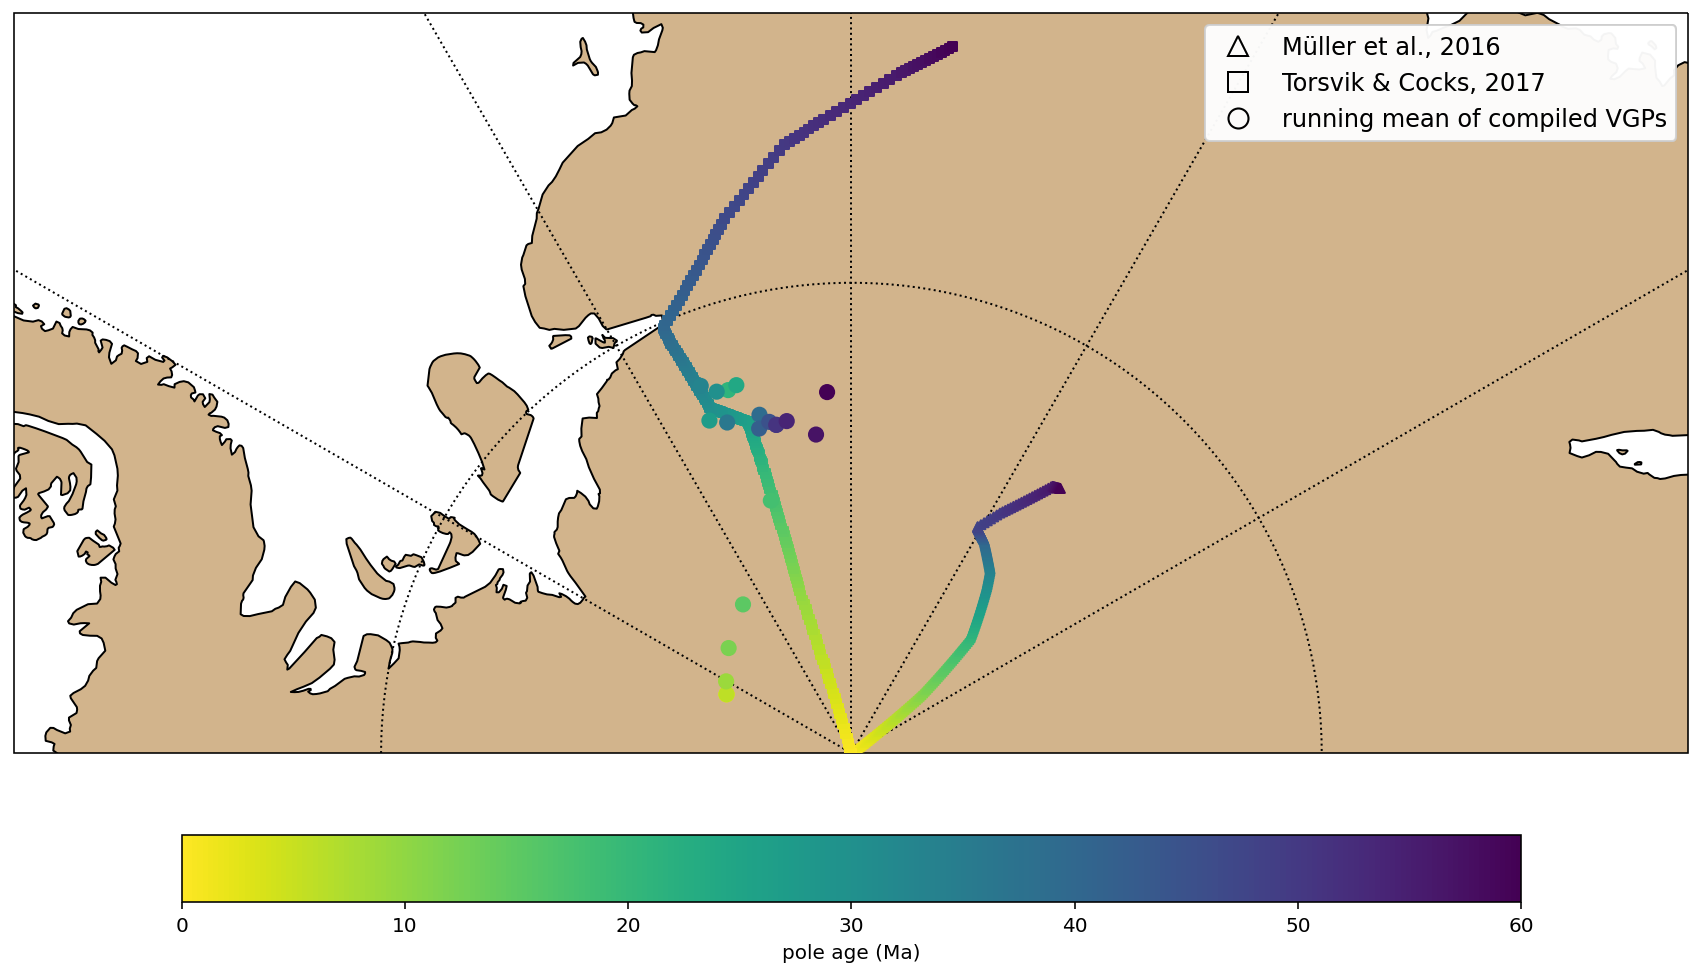

In [46]:
lat_grid=[-80.,  -60.,  -30.,0.,   30.,   60.,  80.]
lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]

map_proj_S = ccrs.Orthographic(central_longitude=0, central_latitude=-90)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1, projection=map_proj_S, )
ax.add_feature(cartopy.feature.LAND, zorder=0,
                       facecolor='tan', edgecolor='k')
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
ax.set_extent((-90,90,-72,-90), crs=ccrs.PlateCarree())

ipmag.plot_poles_colorbar(ax,Mueller2016_path_df['plon'],
                          Mueller2016_path_df['plat'],
                          np.zeros(Mueller2016_path_df.shape[0]),
                          Mueller2016_path_df['age'],
                          0,max_age,colormap='viridis_r',
                          markersize=20,
                          marker='^',
                          edgecolor=None)

ipmag.plot_poles_colorbar(ax,Torsvik2017_path_df['plon'],
                          Torsvik2017_path_df['plat'],
                          np.zeros(Torsvik2017_path_df.shape[0]),
                          Torsvik2017_path_df['age'],
                          0,max_age,colormap='viridis_r',
                          colorbar=0,
                          markersize=20,
                          marker='s',
                          edgecolor=None)

ipmag.plot_poles_colorbar(ax, RM_APWP_rec_POLES['plon'], 
                          RM_APWP_rec_POLES['plat'], 
#                           RM_APWP_rec_POLES['A95'], 
                          np.zeros(RM_APWP_rec_POLES.shape[0]),
                          RM_APWP_rec_POLES['age'],
                          0, 
                          max_age, 
                          colormap='viridis_r',
                          colorbar=0, 
                          markersize=50,
                          edgecolor=None)

Muller_poles = Line2D([],[], markerfacecolor='none', marker = '^', linestyle='None', markeredgecolor='k', markersize=10,
                  label = 'Müller et al., 2016')
Torsvik_poles  = Line2D([],[], markerfacecolor='none', marker = 's', linestyle='None', markeredgecolor='k', markersize=10,
                  label = 'Torsvik & Cocks, 2017')
running_mean_poles = Line2D([],[], markerfacecolor='none', marker = 'o', linestyle='None', markeredgecolor='k', markersize=10,
                  label = 'running mean of compiled VGPs')

legend_1 = plt.legend(handles=[Muller_poles, Torsvik_poles, running_mean_poles], loc='upper right', fontsize=12)
plt.gca().add_artist(legend_1)

plt.show()